In [1]:
from datetime import date
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [2]:
white = pd.read_csv('./data/wineQualityWhites.csv')
red = pd.read_csv('./data/wineQualityReds.csv')

1 - fixed acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

2 - volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

3 - citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines

4 - residual sugar: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

5 - chlorides: the amount of salt in the wine

6 - free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

7 - total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

8 - density: the density of water is close to that of water depending on the percent alcohol and sugar content

9 - pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

10 - sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

11 - alcohol: the percent alcohol content of the wine

Output variable (based on sensory data):
12 - quality (score between 0 and 10)

In [3]:
white['type'] = 'white'
red['type'] = 'red'

In [4]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4898 non-null   int64  
 1   fixed.acidity         4898 non-null   float64
 2   volatile.acidity      4898 non-null   float64
 3   citric.acid           4898 non-null   float64
 4   residual.sugar        4898 non-null   float64
 5   chlorides             4898 non-null   float64
 6   free.sulfur.dioxide   4898 non-null   float64
 7   total.sulfur.dioxide  4898 non-null   float64
 8   density               4898 non-null   float64
 9   pH                    4898 non-null   float64
 10  sulphates             4898 non-null   float64
 11  alcohol               4898 non-null   float64
 12  quality               4898 non-null   int64  
 13  type                  4898 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 535.8+ KB


In [5]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1599 non-null   int64  
 1   fixed.acidity         1599 non-null   float64
 2   volatile.acidity      1599 non-null   float64
 3   citric.acid           1599 non-null   float64
 4   residual.sugar        1599 non-null   float64
 5   chlorides             1599 non-null   float64
 6   free.sulfur.dioxide   1599 non-null   float64
 7   total.sulfur.dioxide  1599 non-null   float64
 8   density               1599 non-null   float64
 9   pH                    1599 non-null   float64
 10  sulphates             1599 non-null   float64
 11  alcohol               1599 non-null   float64
 12  quality               1599 non-null   int64  
 13  type                  1599 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 175.0+ KB


In [6]:
df = pd.concat([white, red])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            6497 non-null   int64  
 1   fixed.acidity         6497 non-null   float64
 2   volatile.acidity      6497 non-null   float64
 3   citric.acid           6497 non-null   float64
 4   residual.sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free.sulfur.dioxide   6497 non-null   float64
 7   total.sulfur.dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
 13  type                  6497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 761.4+ KB


In [8]:
#on renome les colonnes contenant des points 
df = df.rename(columns={"fixed.acidity": "fixed_acidity", "volatile.acidity": "volatile_acidity", "citric.acid": "citric_acid", "residual.sugar" : "residual_sugar", "free.sulfur.dioxide": "free_sulfur_dioxide", "total.sulfur.dioxide": "total_sulfur_dioxide" })

les informations datent de 2009 on va dire que les vins sont tous de 2007

In [9]:
df ['year'] = 2007

#on ajoute une date 

def year_to_date(y):
    today = date.today()
    return date(today.year-y ,today.month , today.day)
df['date'] = df.year.apply(year_to_date)

In [10]:
#on ajoute une categorie par rapport au ph 

def ph_to_categorie(ph):
    if ph < 7: 
        return 'acid'
    elif ph == 7 :
        return 'neutral'
    else:
        return 'basic'
    
    
df['ph_categorie'] = df.pH.apply(ph_to_categorie)

# On ajoute sépare la qualité en 3 notes basse moyenne et top
def quality_to_cat(quality):
    if quality > 6:
        return 'top'
    elif quality > 4:
        return 'moyenne'
    else:
        return 'basse'
df['quality_cat'] = df.quality.apply(quality_to_cat)

In [11]:
df = df.drop(columns=['Unnamed: 0'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
 13  year                  6497 non-null   int64  
 14  date                  6497 non-null   object 
 15  ph_categorie         

## DATA VIZUALISATION

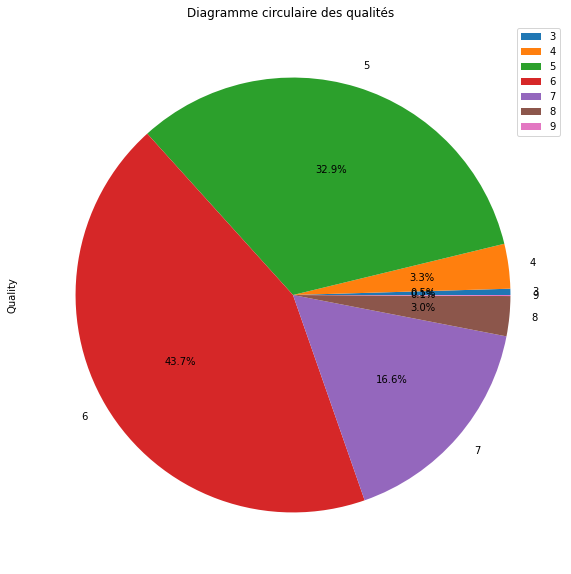

In [13]:
quality = df['quality'].astype('category').cat.categories
list_cat = {j:df.query("quality == '" + str(j) + "'")['quality'].count() for i,j in enumerate(quality.tolist())}
cat_num = []
for k,v in list_cat.items():
    cat_num.append(v)
Data = {'Quality': cat_num}
data = pd.DataFrame(Data,index = list(list_cat))
data.plot.pie(y='Quality',figsize=(10, 10),autopct='%1.1f%%') # autopct % mettre le format 
plt.title("Diagramme circulaire des qualités ")

plt.show()


In [14]:
#On a vu qu'il y a tres peu de valeurs 3 et 9 on va donc les fusionner avec la valeur la plus proche
#et considérer nos notes de qualité allant de 4 a 8
def merge_quality(quality): 
    if quality == 3:
        return 4
    elif quality == 9:
        return 8
    else :
        return quality

df['quality'] = df.quality.apply(merge_quality)

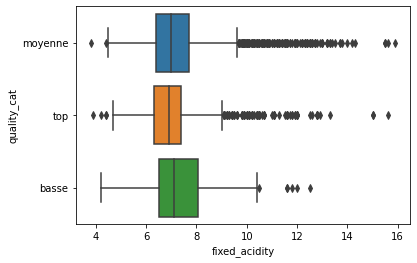

In [15]:
g = sns.boxplot(x="fixed_acidity", y="quality_cat", data=df)

On ne voit pas de différence significative entre l'acidité fixe et la qualité on va enlever les individus abberrants

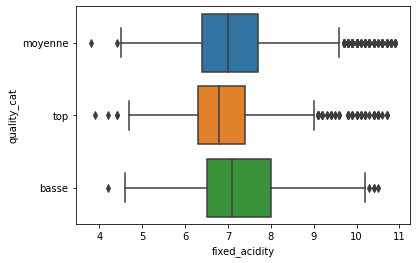

In [16]:
g = sns.boxplot(x="fixed_acidity", y="quality_cat", data=df.query('fixed_acidity < 11'))

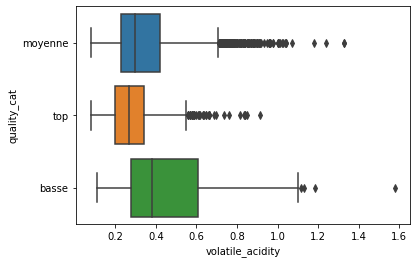

In [17]:
g = sns.boxplot(x="volatile_acidity", y="quality_cat", data=df)

on voit que les vins de qualité ont tendance avoir une quantité d'acides volatiles (qui s'évaporent rapidement inférieur a celle des vins de moyenne est mauvaise qualité ) en moyenne plus le von est de qualité moins il contient d'acides volatiles

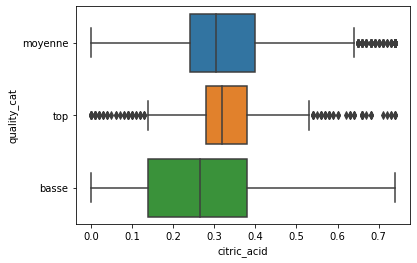

In [18]:
g = sns.boxplot(x="citric_acid", y="quality_cat", data=df.query('citric_acid < 0.75'))

On peut voir que pour les bons vins  contiennet en moyenne de l'acide citrique mais moins que les autres 

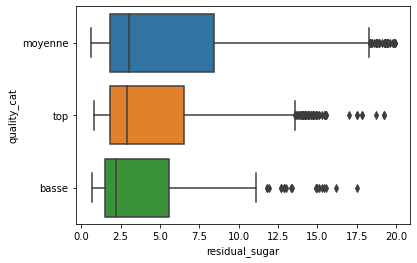

In [19]:
g = sns.boxplot(x="residual_sugar", y="quality_cat", data=df.query('residual_sugar < 20'))

les vins de basse qualité ont tendance a être moins sucrés que les vins de bonne et moyenne qualite 

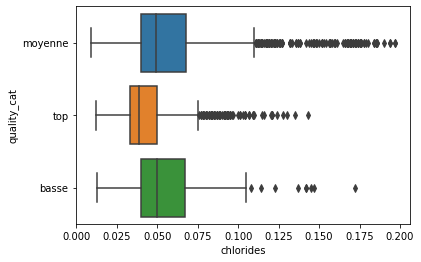

In [20]:
g = sns.boxplot(x="chlorides", y="quality_cat", data=df.query('chlorides < 0.2'))

les vins de bonne qualitée sont en moyenne les moins salés

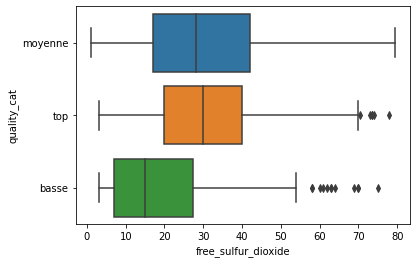

In [21]:
g = sns.boxplot(x="free_sulfur_dioxide", y="quality_cat", data=df.query('free_sulfur_dioxide < 80'))

les vins de basse qualités contiennent en moyenne moins de sulfure dioxide que les autres 

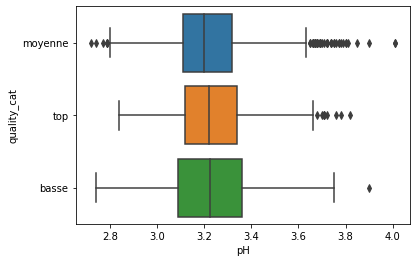

In [22]:
g = sns.boxplot(x="pH", y="quality_cat", data=df)

on ne voit pas de différence significative entre le ph du fin et sa qualité 

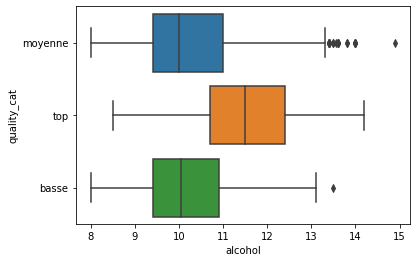

In [23]:
g = sns.boxplot(x="alcohol", y="quality_cat", data=df)

les vins de bonne qualité contiennent plus d'alcool que le autres 

On voit u'il ya en grande majortité des vi

<AxesSubplot:xlabel='quality_cat', ylabel='fixed_acidity'>

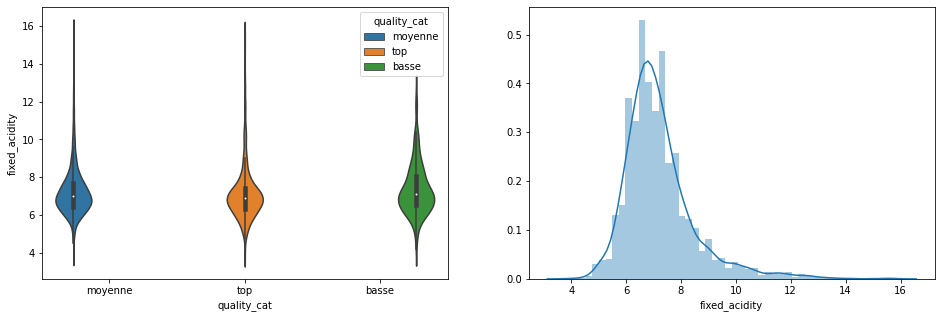

In [24]:
f,(axes,sa)= plt.subplots(1,2,figsize=(16,5))
sns.distplot(df['fixed_acidity'],ax=sa)
sns.violinplot(x='quality_cat',y='fixed_acidity',data=df,hue=df['quality_cat'],ax=axes)

/home/camelia/.local/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/camelia/.local/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


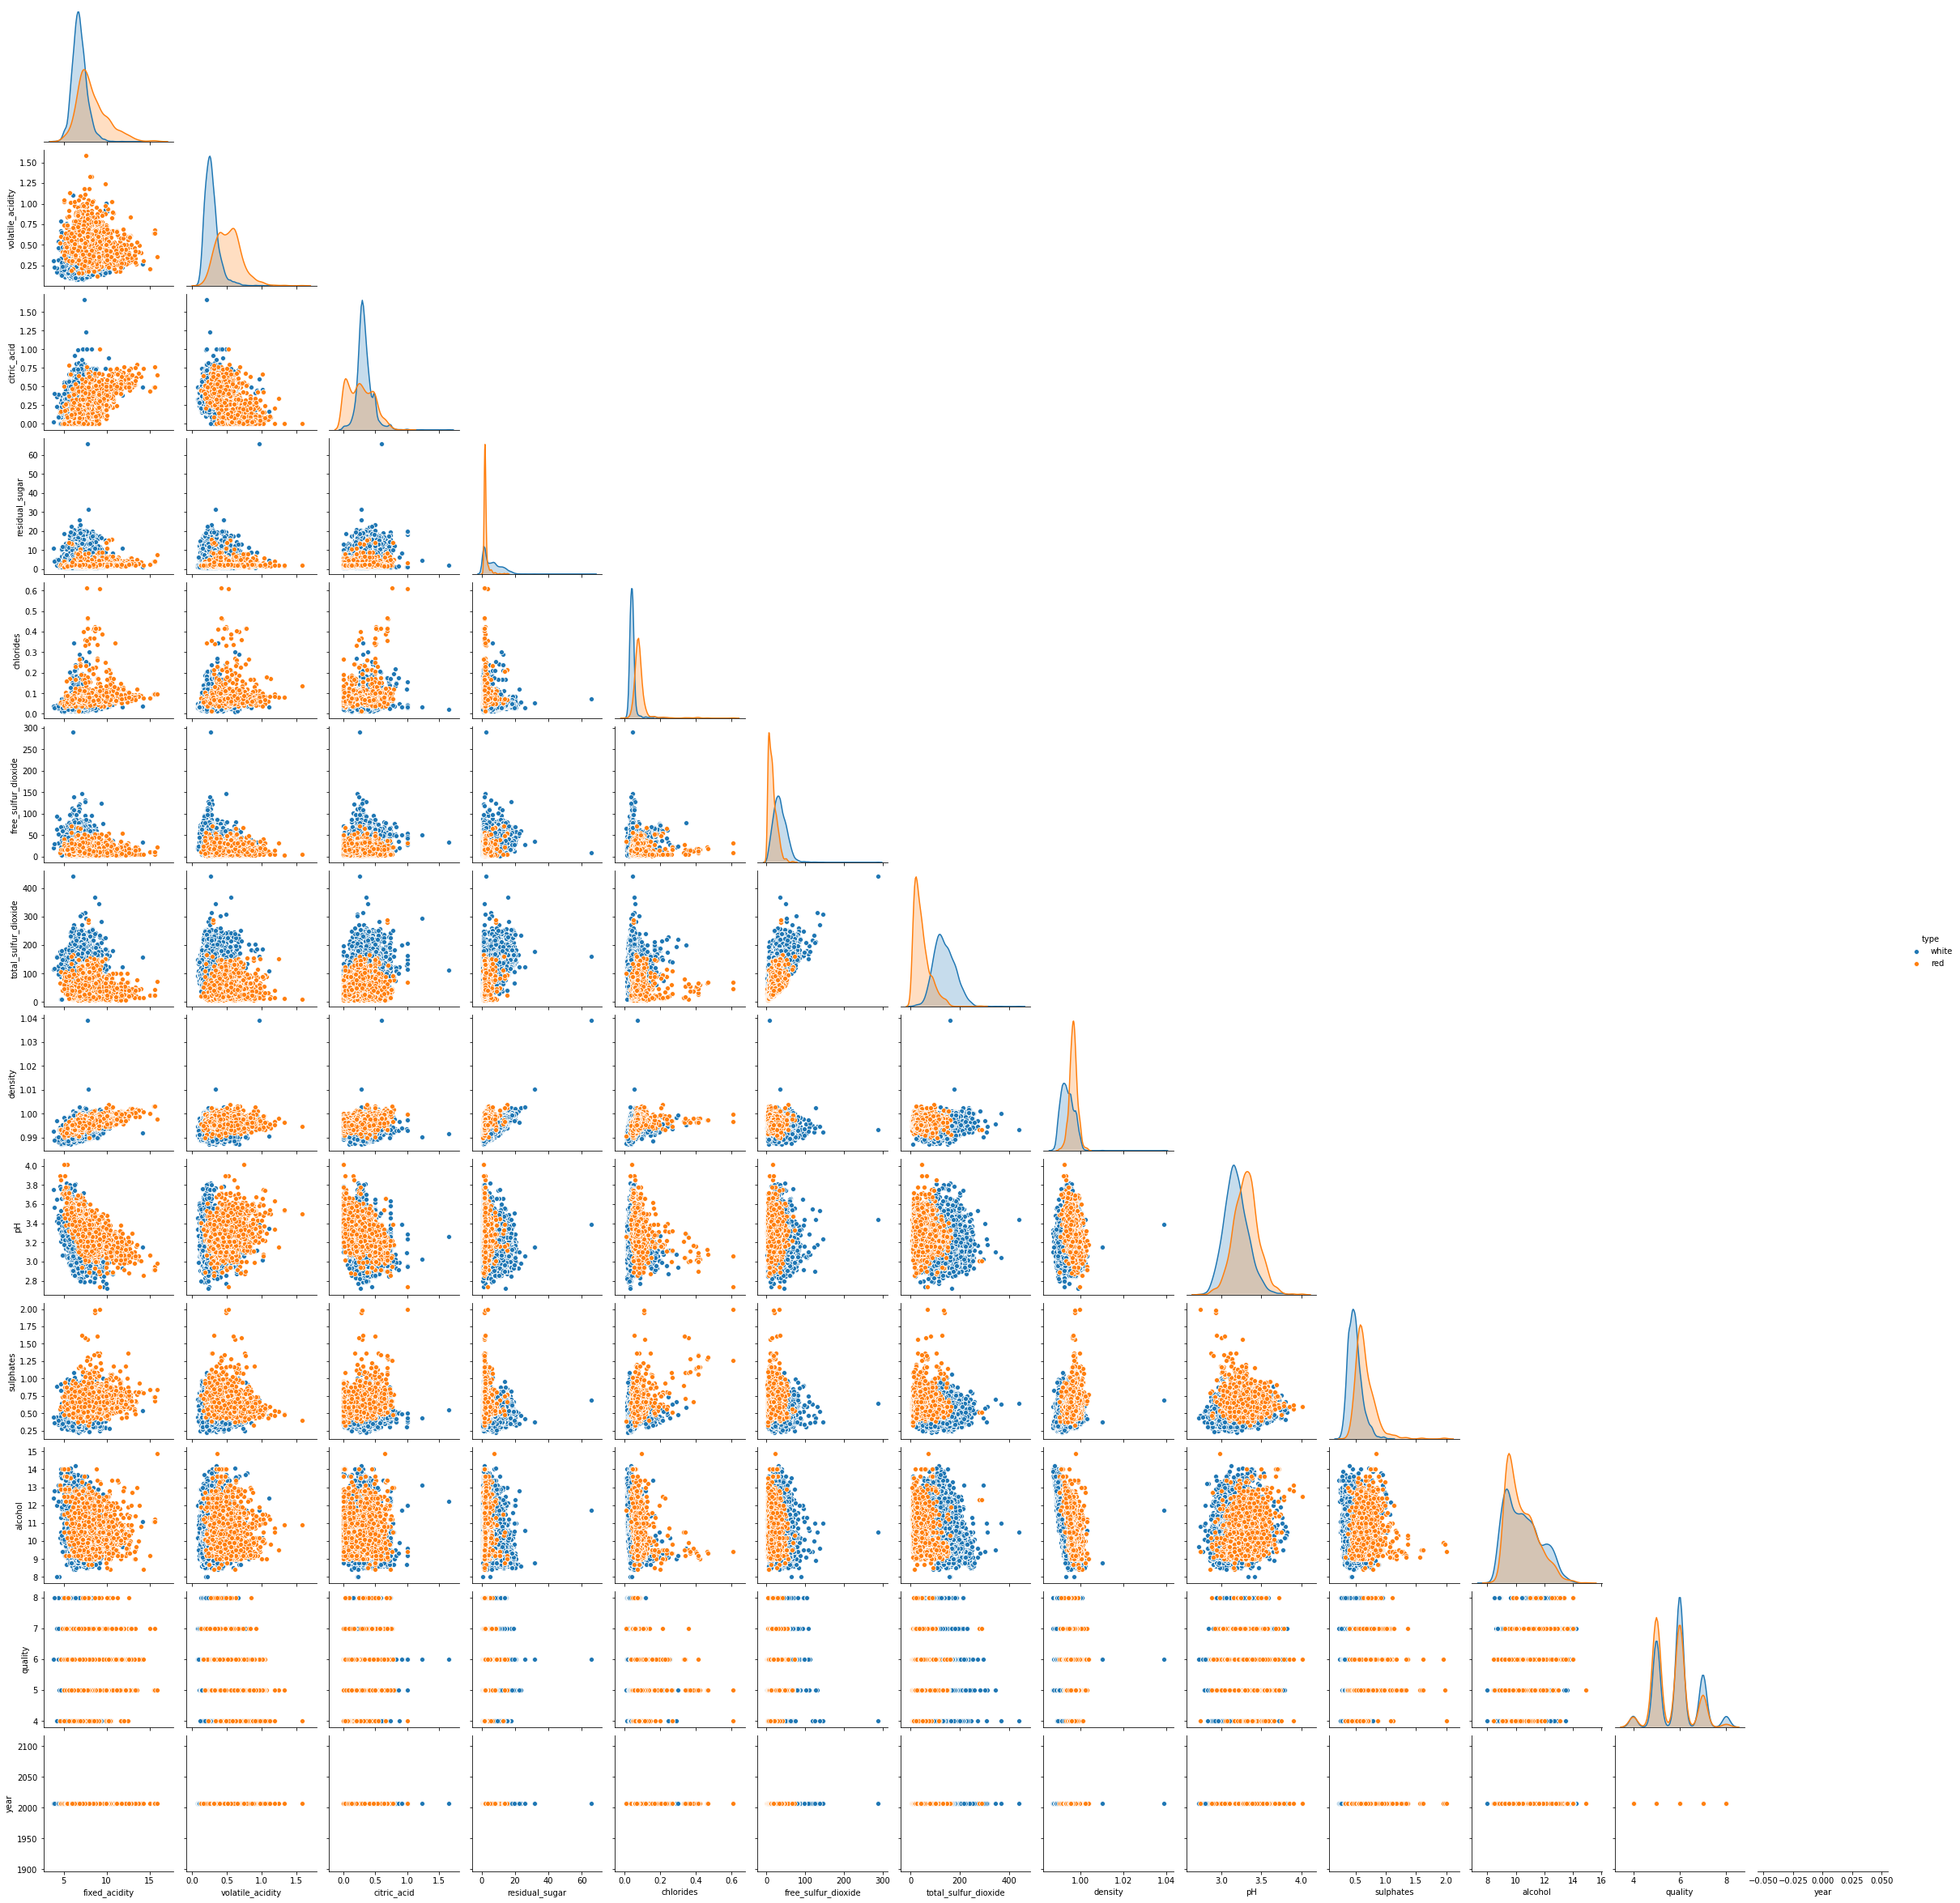

In [25]:
sns.pairplot(df, hue='type', corner=True)

<AxesSubplot:xlabel='fixed_acidity'>

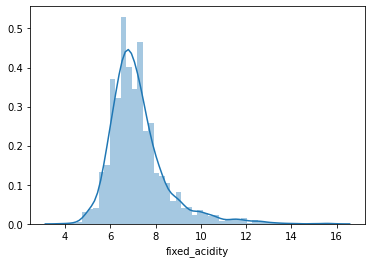

In [26]:
sns.distplot(df.fixed_acidity)

<AxesSubplot:xlabel='volatile_acidity'>

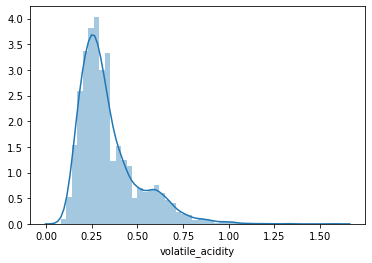

In [27]:
sns.distplot(df.volatile_acidity)

<AxesSubplot:xlabel='citric_acid'>

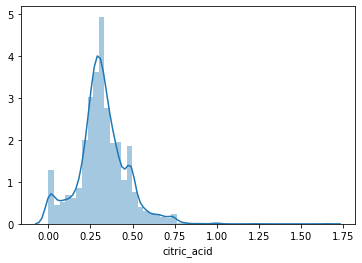

In [28]:
sns.distplot(df.citric_acid)

<AxesSubplot:xlabel='residual_sugar'>

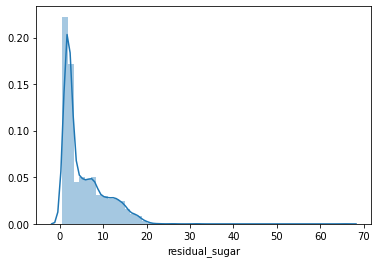

In [29]:
sns.distplot(df.residual_sugar)

<AxesSubplot:xlabel='chlorides'>

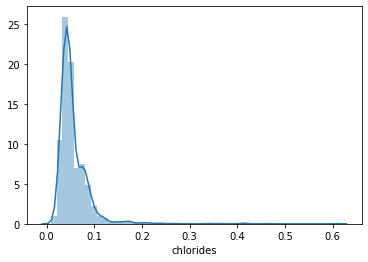

In [30]:
sns.distplot(df.chlorides)

<AxesSubplot:xlabel='free_sulfur_dioxide'>

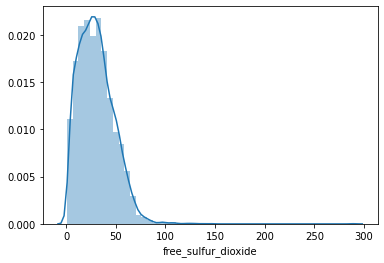

In [31]:
sns.distplot(df.free_sulfur_dioxide)

<AxesSubplot:xlabel='total_sulfur_dioxide'>

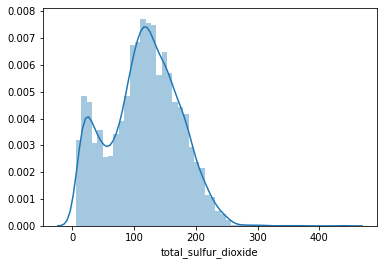

In [32]:
sns.distplot(df.total_sulfur_dioxide)

<AxesSubplot:xlabel='pH'>

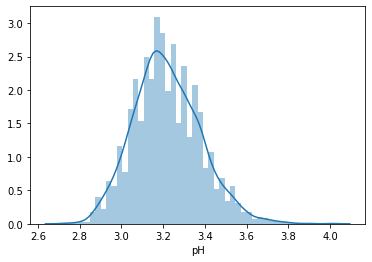

In [33]:
sns.distplot(df.pH)

<AxesSubplot:xlabel='sulphates'>

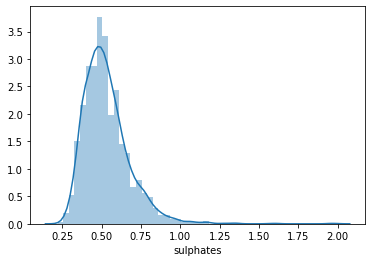

In [34]:
sns.distplot(df.sulphates)

<AxesSubplot:xlabel='alcohol'>

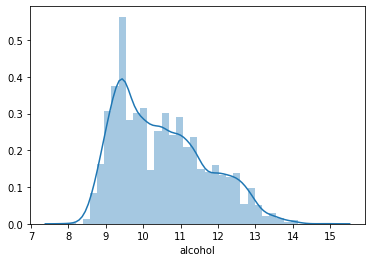

In [35]:
sns.distplot(df.alcohol)

<AxesSubplot:xlabel='quality'>

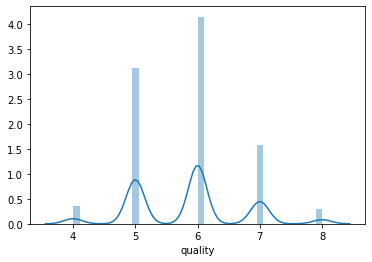

In [36]:
sns.distplot(df.quality)

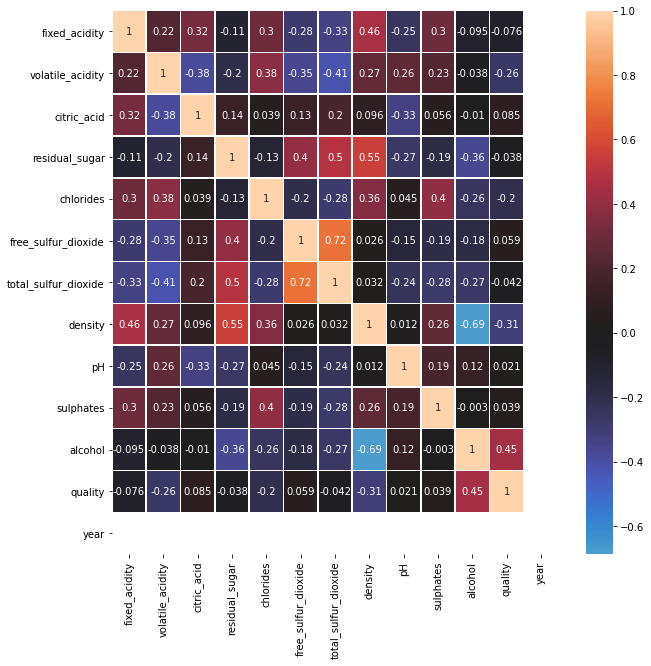

In [37]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,center=0,)
plt.show()

On peut voir forte correlation entre le taux de free sulfure dioxide et le taux de total sulfure dioxide ce qui est prévisible et normal puisque le deuxième dépend en partie du premier 
Autre forte correlation le taux de sucre , l'alcool et la densité du vin encore une fois cette corrélation n'est pas étonnante puisque la densité dépend de ces deux éléments 
Egalement la correlation entre le ph et les différents acides n'est pas perturbante. 
La densité entre le taux d'alcool et les sucres résiduels provient probablement du fait que plus un raison est sucré plus il produira de l'alcool a la fermentation et plus le taux de sucre résiduel est susceptible d'augmenter.


## DATA CLEANING 

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
 13  year                  6497 non-null   int64  
 14  date                  6497 non-null   object 
 15  ph_categorie         

In [39]:
df = df.drop(columns=['quality_cat', 'ph_categorie','date'])

In [40]:
# on cateorise la feature type 
df.type = df['type'].astype('category').cat.codes

In [41]:
df.info()
df.dropna()
df.drop_duplicates()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int8   
 13  year                  6497 non-null   int64  
dtypes: float64(11), int64(2), int8(1)
memory usage: 877.0 KB


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type,year
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1,2007
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1,2007
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1,2007
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1,2007
6,6.2,0.320,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6,1,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,0,2007
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0,2007
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0,2007
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0,2007


## Isolation des features et de la target

In [42]:
# Isolation de la target
Y = df['quality']
# Isolation des features
X = df.drop(columns=['quality'])

In [43]:
# On vas séparer notre environnement de travail en 2 parties : L'environnement de prod (test) et d'entrainement (train)

from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0)

## Selection des meilleurs parametres

### KN Neighbors

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.tree import DecisionTreeClassifier

In [113]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(x_test,y_test)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 25


### Random forest 

In [117]:
# Number of trees in random forest
n_estimators = [int(x) for x in range (200, 2000, 100)]
# Number of features to consider at every split
#max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in range (10, 110, 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
#min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               #'min_samples_split': min_samples_split,
               #'min_samples_leaf': min_samples_leaf
               #'bootstrap': bootstrap
             }
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RF()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
# Fit the random search model
grid_search.fit(x_train, y_train)

grid_search.best_params_

Fitting 3 folds for each of 396 candidates, totalling 1188 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   49.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 26.6min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 42.5min
[Parallel(n_jobs=-1)]: Done 1188 out of 1188 | elapsed: 51.1min finished


{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 1600}

### Decision Tree

In [122]:
#Create a dictionary called param_grid 
param_grid = {'criterion': ['gini','entropy'], 
              'max_depth': range(1,10),
              'min_samples_split' : range(1,10),
              'min_samples_leaf': range(1,5)}
#Create a GridSearchCV object and fit it to the training data
grid = GridSearchCV(DecisionTreeClassifier(),param_grid,refit=True,verbose=2, cv=10)
grid.fit(x_train,y_train)

grid.best_params_

Fitting 10 folds for each of 648 candidates, totalling 6480 fits
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=1, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
[Parallel(n_jobs=1)]: Done 

[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=4 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=4 
[CV]  crit

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=2 
[CV]  crit

[CV]  criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=9, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=9 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=9, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=9 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=9, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=9 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=9, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=9 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=9, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=9 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=9, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=9 
[CV]  crit

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=3 
[CV]  crit

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=2 
[CV]  crit

[CV]  criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=9, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=9 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=9, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=9 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=9, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=9 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=9, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=1, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=1, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=1 
[CV]  crit

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3 
[CV]  crit

[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=8 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=8 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=9 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=9, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=9 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=9, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=9 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=9, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=9 
[CV]  crit

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2 
[CV]  crit

[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=7 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=7 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=7 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=7 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=8 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=8 
[CV]  crit

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=3 
[CV]  crit

[CV] criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=8 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=8 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=8 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=8 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=8 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=8 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=8, total=   0.0s
[CV] crite

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=3 
[CV]  crit

[CV]  criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=8 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=8 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=8 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=8 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=8 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=8 
[CV]  crit

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=3 
[CV]  crit

[CV]  criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=8 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=8 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=8 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=8 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=8 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=8 
[CV]  crit

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=3 
[CV]  crit

[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=8 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=8 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=8 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=9 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=9, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=9 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=9, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=9 
[CV]  crit

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=1, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=1, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=1, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=2 
[CV]  crit

[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=7 
[CV]  crit

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=1, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=1, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=2 
[CV]  crit

[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=8 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=8 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=8 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=8 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=8 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=8 
[CV]  crit

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=3 
[CV]  crit

[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=8 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=8 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=8 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=9 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=9, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=9 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=9, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=9 
[CV]  crit

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=3 
[CV]  crit

[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=9, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=9 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=9, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=9 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=9, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=9 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=9, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=9 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=9, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=9 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=9, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=9 
[CV]  crit

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2 
[CV]  crit

[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=7 
[CV]  crit

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=3 
[CV]  crit

[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=7 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=8 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=8 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=8 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=8 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=8 
[CV]  crit

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=3 
[CV]  crit

[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=8 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=8 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=8 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=8 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=8 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=8 
[CV]  crit

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=1, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=1, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=1, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2 
[CV]  crit

[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=7 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=7 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=7 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=7 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=7 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=7 
[CV]  crit

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=3 
[CV]  crit

[CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=8 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=8 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=8 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=8 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=8 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=8 
[CV]  crit

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=2 
[CV]  crit

[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=8 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=8 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=8 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=8 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=8 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=8 
[CV]  crit

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2 
[CV]  crit

[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=8 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=8 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=8 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=8 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=8 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=8 
[CV]  crit

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=1, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=1, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=1, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=1, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=1, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=1, total=   0.0s
[CV] crite

[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=6, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=6 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=6, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=7 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=7 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=7 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=7 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=7 
[CV]  crit

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=3 
[CV]  crit

[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=8 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=8 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=8 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=8 
[CV]  crit

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=3 
[CV]  crit

[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=7 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=7 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=7 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=7 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=8 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=8 
[CV]  crit

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=2 
[CV]  crit

[CV]  criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=7 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=7 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=8 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=8 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=8 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=8 
[CV]  crit

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=2 
[CV]  crit

[CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=7 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=7 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=7 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=7 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=8 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=8 
[CV]  crit

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=2 
[CV]  crit

[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=8 
[CV]  crit

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=1, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=2 
[CV]  crit

[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=7 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=7 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=7 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=7 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=7 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=7 
[CV]  crit

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=1, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=1, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=1, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=1, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=1, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=1, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=2 
[CV]  crit

[CV]  criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=6, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=6 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=6, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=6 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=6, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=6 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=6, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=7 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=7 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=7 
[CV]  crit

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=3 
[CV]  crit

[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=8 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=8 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=8 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=8 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=8 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=8 
[CV]  crit

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=3 
[CV]  crit

[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=8 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=8 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=8 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=8 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=8 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=8 
[CV]  crit

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=2 
[CV]  crit

[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=8 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=8 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=8 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=8 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=8 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=8 
[CV]  crit

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=2 
[CV]  crit

[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=7 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=7 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=7 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=7 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=8 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=8 
[CV]  crit

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=3 
[CV]  crit

[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=8 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=8 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=8 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=8 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=8 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=8 
[CV]  crit

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2 
[CV]  crit

[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=8 
[CV]  crit

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=3 
[CV]  crit

[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=8 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=8 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=8 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=8 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=8 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=8, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=8 
[CV]  crit

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_lea

[CV]  criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=7 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=7 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=7 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=7 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=8 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_lea

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_lea

[CV]  criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=8 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=8 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=8 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=8 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=8 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_lea

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_lea

[CV]  criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=9, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=9 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=9, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=9 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=9, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=9 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=9, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=9 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=9, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=1, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_lea

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_lea

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_lea

[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=7 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=7 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=7 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=8 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=8 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_lea

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_lea

[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=8 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=8 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=8 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=8 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=8 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_lea

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_lea

[CV]  criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=9 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=9, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=9 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=9, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=9 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=9, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=9 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=9, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=9 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=9, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_lea

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_lea

[CV]  criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=8 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=8 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=8 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=8 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=8 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_lea

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_lea

[CV]  criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=8 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=8 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=8 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=9 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=9, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=9 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=9, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_lea

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_lea

[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=9, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=9 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=9, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=9 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=9, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=9 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=9, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=9 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=9, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=9 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=9, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_lea

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_lea

[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=8 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=8 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=8 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=8 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=8 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_lea

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_lea

[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=8 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=8 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=8 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=8 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=9 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=9, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_lea

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=1, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=1, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=1, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=1, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=1, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=1, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_lea

[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=6, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=6 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=6, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=6 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=6, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=6 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=6, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=6 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=6, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=6 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=6, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_lea

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_lea

[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=8 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=8 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=8 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=8 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=8 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_lea

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_lea

[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=8 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=8 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_sampl

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_lea

[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=8 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=8 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=8 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=8 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=8 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_lea

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_lea

[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=7 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=7 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=7 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=7 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=8 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_lea

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=1, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=1, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=1, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=1, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=1, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_lea

[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=6, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=6 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=6, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=6 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=6, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=6 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=6, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=6 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=6, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=7 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_lea

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_lea

[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_lea

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=1, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=1, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_lea

[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=6, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=6 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=6, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=7 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=7 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=7 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=7 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_lea

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_lea

[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=7 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=8 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=8 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=8 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=8 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_lea

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_lea

[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=7 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=7 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=7 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=8 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=8 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_lea

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_lea

[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_lea

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=1, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=1, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_lea

[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=7 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=7 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=7 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=7 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=7 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_lea

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_lea

[CV]  criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=7 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=8 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=8 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=8 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=8 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_lea

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_lea

[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=7 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=7 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=7 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=7 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=8 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_lea

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_lea

[CV]  criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=8 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=8 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=8 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=8 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=8 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=8, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_lea

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_lea

[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=7 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=7 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=7 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=7 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=7 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_lea

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_lea

[CV]  criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=7 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=7 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=7 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=7 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=7 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_lea

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=1, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=1, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=1, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=1, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=1, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=1, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_lea

[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=6, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=6 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=6, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=6 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=6, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=6 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=6, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=6 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=6, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=7 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_lea

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=1, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=1, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=1, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=1, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=1, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=1, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_lea

[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=6, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=6 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=6, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=6 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=6, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=6 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=6, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=6 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=6, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=6 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=6, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_lea

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_lea

[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=7 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=7 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=7 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=7 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=7 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_lea

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=7 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=7 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=7 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=7 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=7 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=6, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=6 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=6, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=7 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=7 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=7 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=7 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=6, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/camelia/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/camelia/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarnin

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=7 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=7 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=7 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=7 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=7 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

[Parallel(n_jobs=1)]: Done 6480 out of 6480 | elapsed:  2.0min finished


{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [ ]:
from sklearn.svm import SVC
param_grid_test = {'kernel': ['linear', 'poly', 'rbf', 'precomputed'], 
                  'C':[1.0,3.0, 5.0, 10.0],
                  'degree' : range(1,10, 3)}
gridSVC = GridSearchCV(SVC(),param_grid_test,refit=True,verbose=2, cv=10)
gridSVC.fit(x_train,y_train)
#gridSVC.estimator.get_params().keys()
gridSVC.best_params_

Pas le temps de le laisser tourner 

## Model building

###  KN Neighbors

In [45]:
def accuracy_score(preds, Y):
  return ((preds == Y).sum() / len(Y)* 100)

In [49]:
#Passage des HYPERPARAMETRES
knn = KNeighborsClassifier(n_neighbors=25,leaf_size = 1, p=1 )
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
probaKNN = knn.predict_proba(x_test)
#accuracy(y_pred, y_test)
accuracyknn = accuracy_score(y_test, y_pred_knn)
print(accuracyknn, '%')

47.87692307692308 %


### Random Forest

In [50]:
# Passage des hyperparamtres
#{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 1600}
rf = RF(n_estimators=1600, max_features='sqrt' , max_depth=None)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
probaRF = rf.predict_proba(x_test)

#accuracy(y_pred,y_test)
accuracyRF = accuracy_score(y_test, y_pred_rf)
print(accuracyRF, '%')

68.86153846153846 %


### Decision Tree

In [52]:
#passage des meilleurs paramètres calculés précédemment 
dt = DecisionTreeClassifier(criterion='gini', max_depth=9, min_samples_leaf= 1, min_samples_split=2)
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)
probaDT = dt.predict_proba(x_test)

#accuracy (y_pred, y_test)
accuracyDT = accuracy_score(y_test, y_pred_dt)
print(accuracyDT, '%')

56.00000000000001 %


### SVC

In [ ]:
#Passage des HYPERPARAMETRES
svc = SVC(C= , kernel='' , max_iter=)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
#accuracy(y_pred, y_test)
accuracy = accuracy_score(y_test, y_pred)*100
print(accuracy, '%')


Du coup pas le temps de faire celui ci non plus 

## Importance des features

### KN Neighbors

Le test pour déterminer l'importance de chaque feature avec knn c'est de lancer knn en enlevant une feature a chaque fois et de comparer le resultat 

### Random Forest 

In [53]:
importance = rf.feature_importances_
importance

array([0.07480593, 0.0996946 , 0.07944142, 0.08548721, 0.08700942,
       0.08661396, 0.09119813, 0.10131308, 0.08389672, 0.08525554,
       0.12156763, 0.00371637, 0.        ])

Somme des pouvoirs predictif : 1.0000000000000002
L'unité du pouvoir prédictif est en %


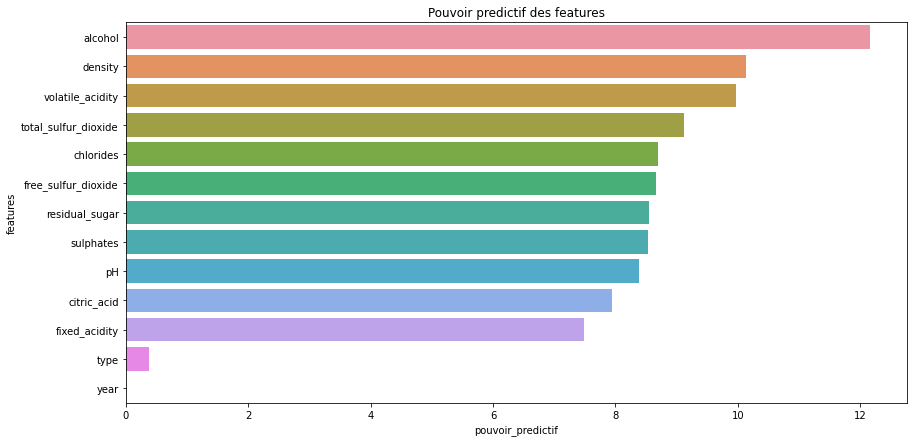

In [55]:
plt.figure(figsize=(14,7))

d = pd.DataFrame()
d['features'] = x_train.columns
d['pouvoir_predictif'] = importance
print('Somme des pouvoirs predictif : {}'.format(d['pouvoir_predictif'].sum()))
d['pouvoir_predictif'] = d['pouvoir_predictif'].apply(lambda v : v*100)
d = d.sort_values(by='pouvoir_predictif', ascending=False)
sns.barplot(d['pouvoir_predictif'], d['features']).set_title('Pouvoir predictif des features');
print('L\'unité du pouvoir prédictif est en %')

On peut voir que chaque feature est importante ce qui montre qu'un bon vin est un équilibre de saveurs 

## Matrice de confusion 

### Kn Neighbors 

In [68]:
from sklearn.metrics import confusion_matrix
qual = Y.astype('category').cat.categories.tolist()
def show_cm(cm, labels):
    df_cm = pd.DataFrame(cm, labels, labels)
    sns.heatmap(df_cm, annot=True)
    plt.show()

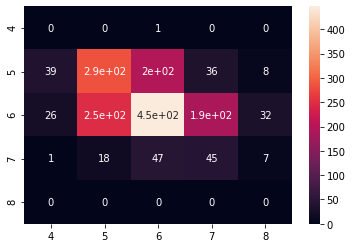

In [69]:
cm_train = confusion_matrix(y_pred_knn, y_test, labels=qual)
show_cm(cm_train, qual)

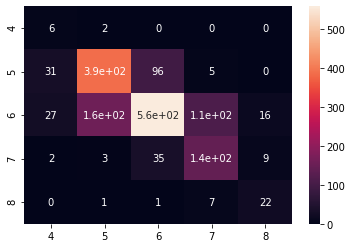

In [70]:
cm_train = confusion_matrix(y_pred_rf, y_test, labels=qual)
show_cm(cm_train, qual)

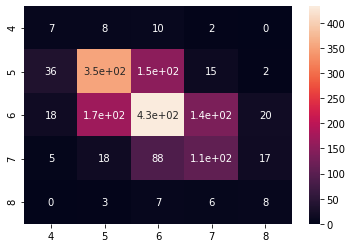

In [71]:
cm_train = confusion_matrix(y_pred_dt, y_test, labels=qual)
show_cm(cm_train, qual)

### Courbe ROC 

## Export des modeles 
pour l'export on choisit les deux modeles avec l'accuracy la plus élevée

In [72]:
import joblib


In [73]:
joblib.dump(knn, 'knn.pkl')

['knn.pkl']

In [74]:
joblib.dump(dt, 'dt.pkl')

['dt.pkl']

In [75]:
y_pred_knn

array([6, 5, 5, ..., 5, 6, 5])